# ANN 01: Fashion-MNIST 기초 분류

이 챕터에서는 **Fashion-MNIST 데이터셋**을 활용해  
기본적인 인공신경망(ANN) 모델을 구성하고 학습합니다.

📌 목표:
- 데이터셋 불러오기 & 확인
- 간단한 Dense 모델 구성
- 학습 & 평가


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import platform
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# 한글 + 이모지 폰트 설정 (운영체제별 자동 감지)
if platform.system() == 'Linux':
    plt.rcParams['font.family'] = 'NanumGothic'
elif platform.system() == 'Darwin':  # macOS
    plt.rcParams['font.family'] = 'AppleGothic'
else:  # Windows
    plt.rcParams['font.family'] = 'Malgun Gothic'

plt.rcParams['axes.unicode_minus'] = False

print("✅ 라이브러리 로드 완료, TensorFlow 버전:", tf.__version__)


2025-09-01 17:52:42.258541: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-01 17:52:43.116120: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-01 17:52:47.001204: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


✅ 라이브러리 로드 완료, TensorFlow 버전: 2.20.0


In [2]:
# Fashion-MNIST 데이터셋 불러오기
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

print("학습 데이터:", x_train.shape, y_train.shape)
print("테스트 데이터:", x_test.shape, y_test.shape)


학습 데이터: (60000, 28, 28) (60000,)
테스트 데이터: (10000, 28, 28) (10000,)


## 👗 데이터셋 샘플 확인
- Fashion-MNIST는 28x28 흑백 이미지 (의류 10종 분류)
- 라벨(0~9)은 아래와 같이 매핑됨:

0: T-shirt/top  
1: Trouser  
2: Pullover  
3: Dress  
4: Coat  
5: Sandal  
6: Shirt  
7: Sneaker  
8: Bag  
9: Ankle boot


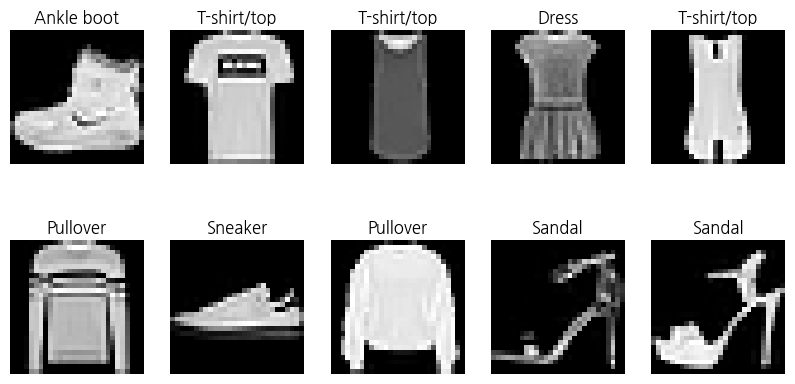

In [3]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i], cmap="gray")
    plt.title(class_names[y_train[i]])
    plt.axis("off")
plt.show()


In [4]:
# 픽셀값 0~255 → 0~1 범위로 정규화
x_train = x_train / 255.0
x_test = x_test / 255.0

print("✅ 데이터 정규화 완료")


✅ 데이터 정규화 완료


## 🧠 간단한 ANN 모델 구성
- Flatten: 28x28 → 784 벡터
- Dense(128, relu)
- Dense(10, softmax)


In [5]:
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.summary()


/home/ccd/dl/v_dl/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-09-01 17:52:49.533846: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history = model.fit(x_train, y_train, epochs=5,
                    validation_split=0.1, batch_size=32)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8211 - loss: 0.5108 - val_accuracy: 0.8542 - val_loss: 0.4168
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8625 - loss: 0.3812 - val_accuracy: 0.8648 - val_loss: 0.3721
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8753 - loss: 0.3419 - val_accuracy: 0.8737 - val_loss: 0.3551
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8836 - loss: 0.3154 - val_accuracy: 0.8713 - val_loss: 0.3488
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8899 - loss: 0.2993 - val_accuracy: 0.8788 - val_loss: 0.3371


In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"✅ 테스트 정확도: {test_acc:.4f}")


✅ 테스트 정확도: 0.8710


## ✅ 정리
이번 챕터에서 배운 것:
- Fashion-MNIST 데이터셋 구조
- ANN 기본 모델 (Flatten → Dense → Dense)
- 모델 학습 및 정확도 평가

👉 다음 챕터: **Logistic Regression으로 비교 실습**
